# Dog Image Mood Classification

> Using Convolutional Neural Network Deep Learning model

### Params

In [1]:
IMAGE_SIZE = 227
NUM_CHANELLS = 3
LEN_FEATURES = IMAGE_SIZE * IMAGE_SIZE * NUM_CHANELLS
NUM_OF_EPOCHS = 50
ZISE_OF_IMAGES = 9000
BATCH_SIZE = 32
LEARNING_RATE = 0.000001
CLASSES = ['happy', 'sad']

### Paths

In [2]:
PATH = r"D:\\Projects\Development\\courses_projects\\deep_learning_and_natural_language_processing\\dog-image-mood-classification"
PATH_TO_DATA = PATH + '\\' + "data\\images"
RES_PATH = r"results\\"
MODEL_HISTORY_FILEPATH = r"D:\\Projects\\Development\\courses_projects\\deep_learning_and_natural_language_processing\\dog-image-mood-classification\\models_history\\model_4.hdf5"

### Importing

In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "8"

In [4]:
# modeling
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import shuffle
import cv2

# tools
from typing import Tuple
import os
import random
import numpy as np
from datetime import datetime

# warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

### Util Functions

In [5]:
def load_data(classes) -> Tuple[np.array, np.array]:
  images = []
  labels = []
  files = []
  for i in range(len(classes)):
    folder_name = classes[i]
    path = os.path.join(PATH_TO_DATA, folder_name)
    count = 0
    for file_index, file_name in enumerate(os.listdir(path)):
      file_name = os.path.join(path, file_name)
      image = cv2.imread(file_name)
      image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
      images.append(image)
      label = [i]
      labels.append(label)
      files.append(os.path.join(path, file_name))
      if count == ZISE_OF_IMAGES / 2:
        break
      count += 1
  return np.array(images), np.array(labels)

### Load Data

In [6]:
train_images, train_labels = load_data(CLASSES)
train_images, train_labels = shuffle(train_images, train_labels)

In [7]:
print(f"Shape of training data: {train_images.shape}")

Shape of training data: (9002, 227, 227, 3)


In [8]:
print(f"Size of train: {len(train_images)}")

Size of train: 9002


In [9]:
x_train = train_images.astype('float32') / 255.0
y_train = np.asarray(train_labels).astype('float32').reshape((-1,1))

### Build Model

In [10]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='valid', activation='relu', input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

model.add(tf.keras.layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

model.add(tf.keras.layers.Conv2D(384, (3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(3, 2)))

model.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.GlobalAveragePooling2D())

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4096, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 113, 113, 128)     3584      
                                                                 
 batch_normalization (BatchN  (None, 113, 113, 128)    512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 256)       295168    
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 256)      1024      
 hNormalization)                                                 
                                                        

### Train Model

In [12]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=MODEL_HISTORY_FILEPATH,
    monitor='val_accuracy',
    mode='auto',
    save_best_only=True
    )

train_scores = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=NUM_OF_EPOCHS, shuffle=True, validation_split=0.2, callbacks=[model_checkpoint_callback])

Epoch 1/30
226/226 [==============================] - 316s 1s/step - loss: 0.6847 - accuracy: 0.5639 - val_loss: 0.6963 - val_accuracy: 0.5103
Epoch 2/30
226/226 [==============================] - 311s 1s/step - loss: 0.6693 - accuracy: 0.5959 - val_loss: 0.6895 - val_accuracy: 0.5247
Epoch 3/30
226/226 [==============================] - 311s 1s/step - loss: 0.6629 - accuracy: 0.6041 - val_loss: 0.6659 - val_accuracy: 0.5919
Epoch 4/30
226/226 [==============================] - 310s 1s/step - loss: 0.6581 - accuracy: 0.6132 - val_loss: 0.6570 - val_accuracy: 0.5919
Epoch 5/30
226/226 [==============================] - 310s 1s/step - loss: 0.6536 - accuracy: 0.6155 - val_loss: 0.6530 - val_accuracy: 0.5991
Epoch 6/30
226/226 [==============================] - 309s 1s/step - loss: 0.6517 - accuracy: 0.6210 - val_loss: 0.6494 - val_accuracy: 0.6047
Epoch 7/30
226/226 [==============================] - 310s 1s/step - loss: 0.6482 - accuracy: 0.6238 - val_loss: 0.6465 - val_accuracy: 0.6135

### Results

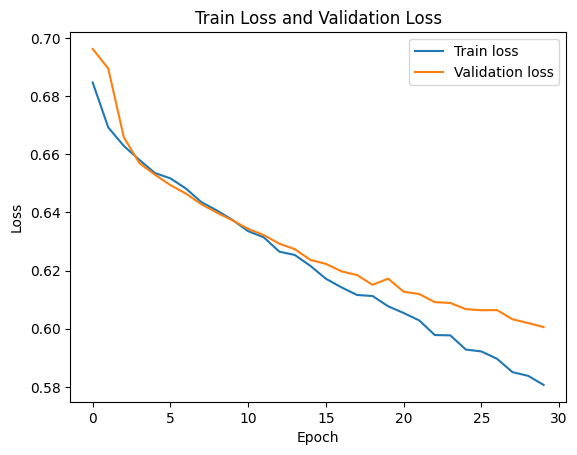

In [13]:
plt.title("Train Loss and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(np.arange(NUM_OF_EPOCHS), train_scores.history['loss'])
plt.plot(np.arange(NUM_OF_EPOCHS), train_scores.history['val_loss'])
plt.legend(["Train loss", "Validation loss"])
plt.show()

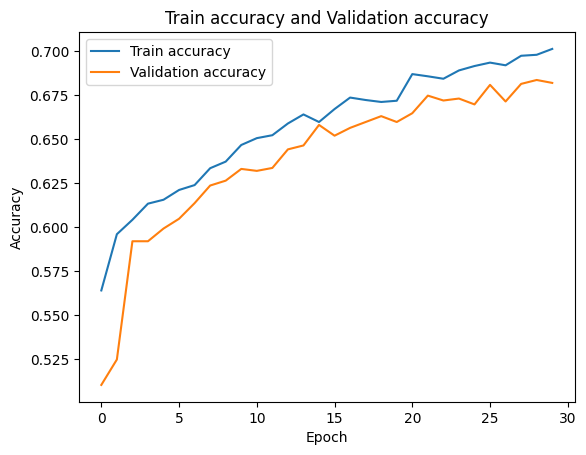

In [14]:
plt.title("Train accuracy and Validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(np.arange(NUM_OF_EPOCHS), train_scores.history['accuracy'])
plt.plot(np.arange(NUM_OF_EPOCHS), train_scores.history['val_accuracy'])
plt.legend(["Train accuracy", "Validation accuracy"])
plt.show()